## **CA01 Assignment**
By: *Kyle Rauscher*


# Importing and reviewing the dataset structure

In [89]:
#import necessary and used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [90]:
#read data from github link
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [91]:
# print the DataFrame's shape
print(df.shape)

(1460, 81)


In [92]:
# print the DataFrame's data types
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [93]:
#see examples of the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Part 1. DATA QUALITY REPORT and Visualizations

##Data Quality Report

**(a) Continuous Variables**

In [94]:
#first step is to create a data quality report
##we can start this by first looking at the descriptive statics of continuous variables
continuous_vars = df.select_dtypes(include=['float', 'int'])
continuous_summary = continuous_vars.describe().append(continuous_vars.nunique().rename('cardinality')).append((continuous_vars.isna().sum()/len(df)*100).rename('% missing')).T
print(continuous_summary)

                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452  

(b) Categorical Variables

In [95]:
#as we have created a data quality report for continuous variables we now need to make one for the categorical variables
categorical_vars = df.select_dtypes(include=['object','category'])
# Create a data quality report for the categorical features
categorical_summary = pd.DataFrame(categorical_vars.count(), columns=['count'])
categorical_summary['cardinality'] = pd.DataFrame(categorical_vars.nunique())
categorical_summary['% missing'] = categorical_vars.isna().sum()/len(df)*100
categorical_summary['mode'] = categorical_vars.mode().iloc[0]
categorical_summary['mode frequency'] = categorical_vars.apply(lambda x: x.value_counts().iloc[0])
categorical_summary['mode %'] = (categorical_summary['mode frequency'] / len(categorical_vars) *100).round(2)

print(categorical_summary)

               count  cardinality  % missing     mode  mode frequency  mode %
MSZoning        1460            5   0.000000       RL            1151   78.84
Street          1460            2   0.000000     Pave            1454   99.59
Alley             91            2  93.767123     Grvl              50    3.42
LotShape        1460            4   0.000000      Reg             925   63.36
LandContour     1460            4   0.000000      Lvl            1311   89.79
Utilities       1460            2   0.000000   AllPub            1459   99.93
LotConfig       1460            5   0.000000   Inside            1052   72.05
LandSlope       1460            3   0.000000      Gtl            1382   94.66
Neighborhood    1460           25   0.000000    NAmes             225   15.41
Condition1      1460            9   0.000000     Norm            1260   86.30
Condition2      1460            8   0.000000     Norm            1445   98.97
BldgType        1460            5   0.000000     1Fam           

In [96]:
#looking at our data we can see that MSSubClass, is listed as a continuous when it should be in fact a categorical feature
#using the info from the text sheet we can bin the number into various categories
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 120, 150, 160, 180, 190, 200]
labels = ['20', '30', '40', '50', '60', '70', '80', '90', '120', '150', '160', '180', '190', '200']

# convert MSSubClass to categorical feature
df['MSSubClass_categorical'] = pd.cut(df['MSSubClass'], bins=bins, labels=labels)

## Visualizations

**Now we create visuals to support the creation of our data quality report**

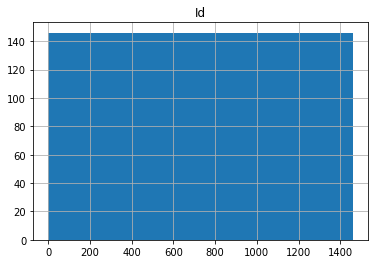

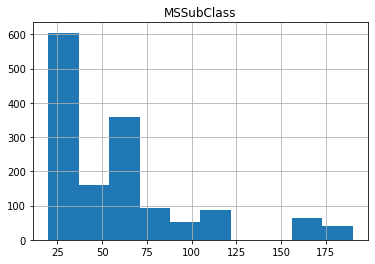

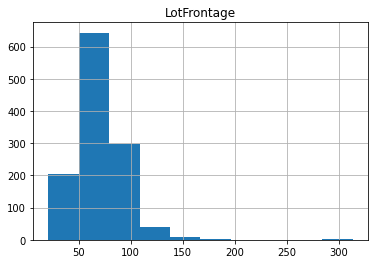

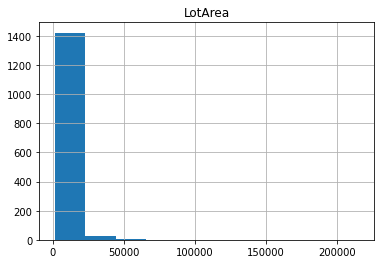

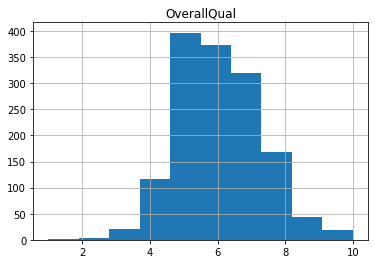

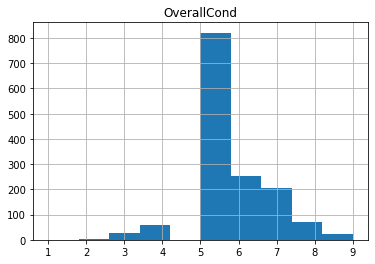

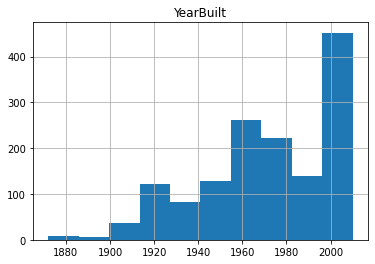

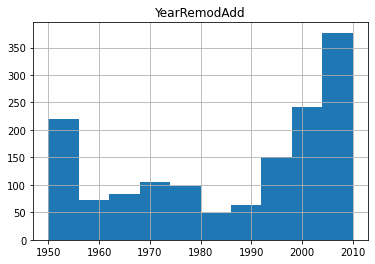

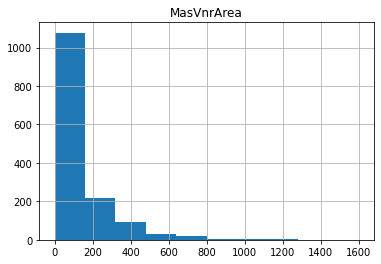

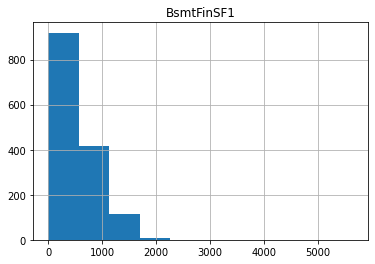

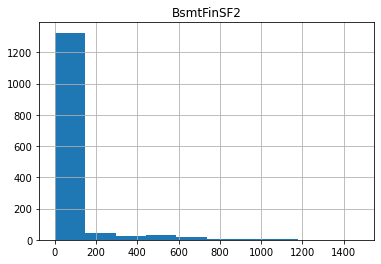

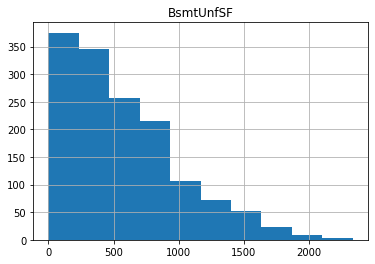

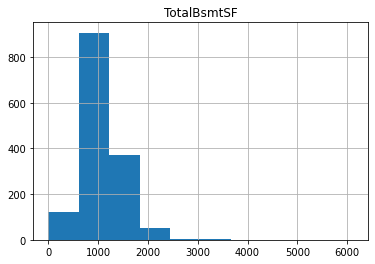

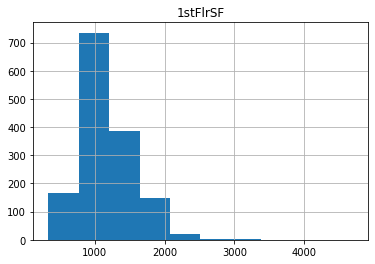

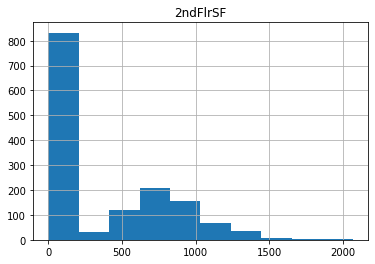

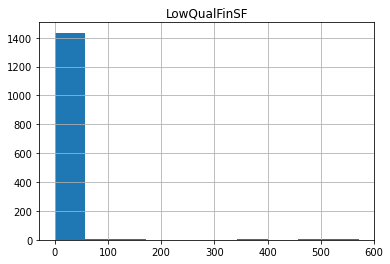

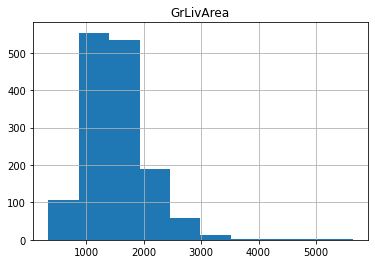

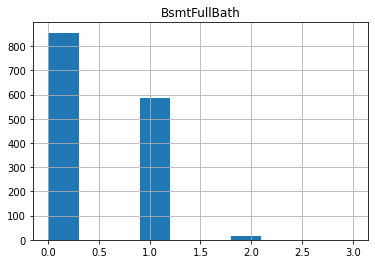

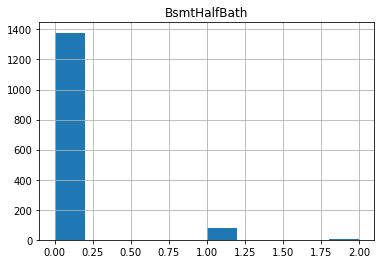

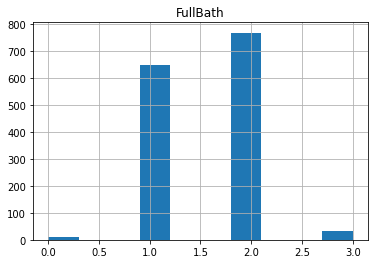

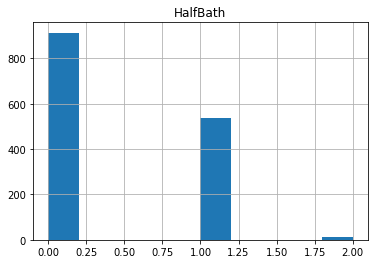

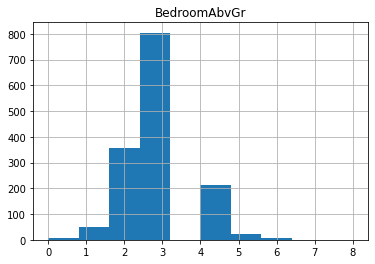

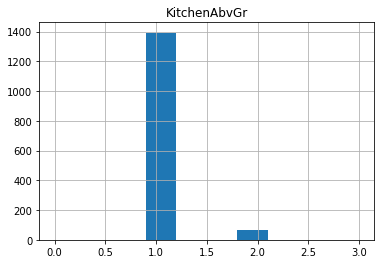

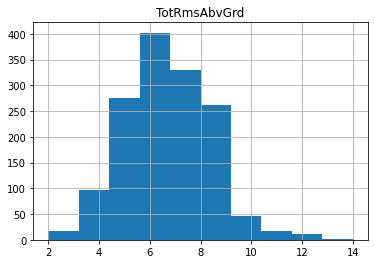

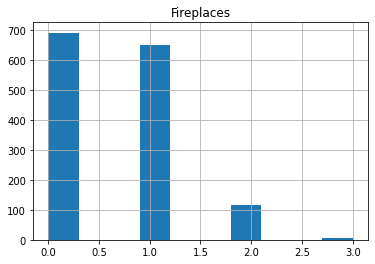

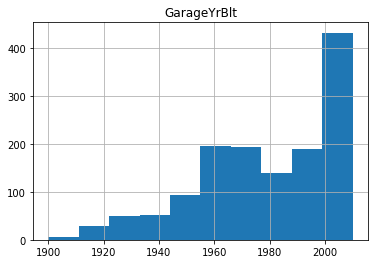

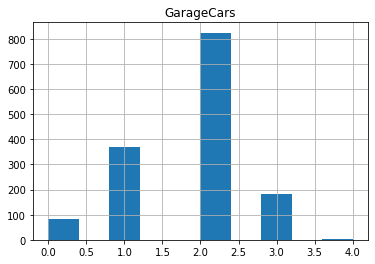

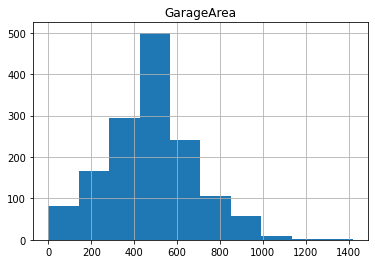

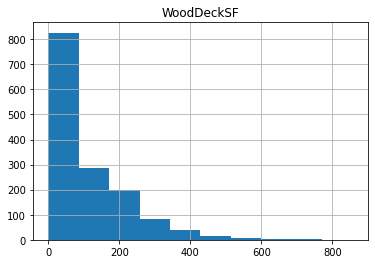

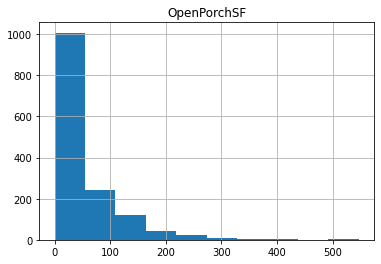

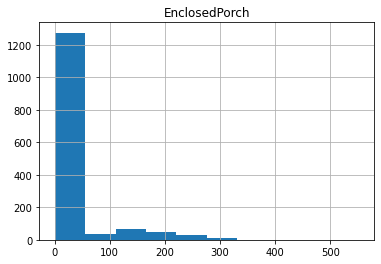

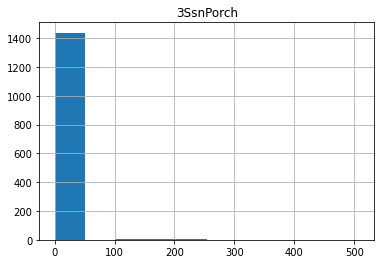

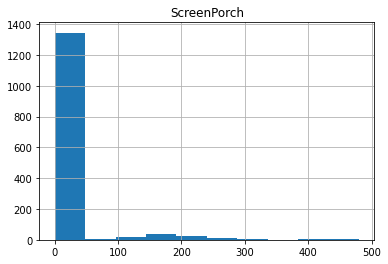

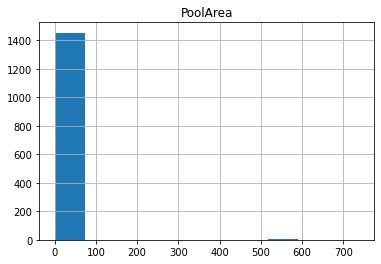

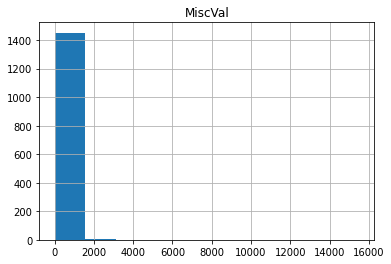

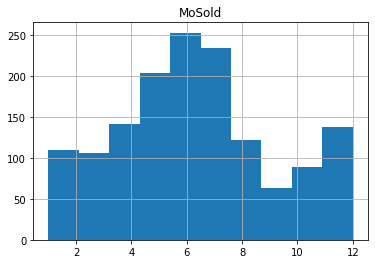

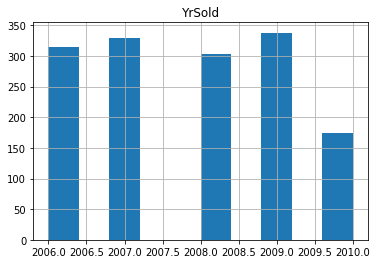

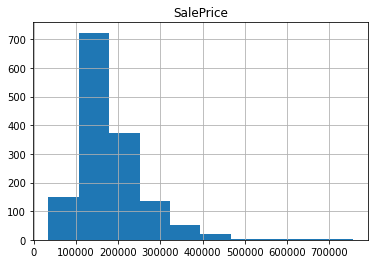

In [97]:
#start with creating the histogram for each of the numeric columns
#using the dataframe from about with just continuous variables

for column in continuous_vars:
    plt.figure()
    continuous_vars[column].hist()
    plt.title(column)
    plt.show()

**Visuals for the Categorical Varaibles**

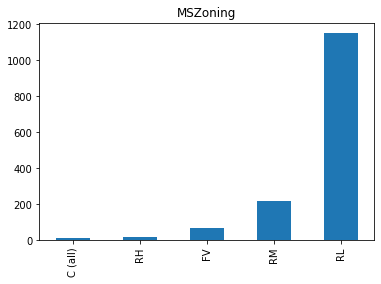

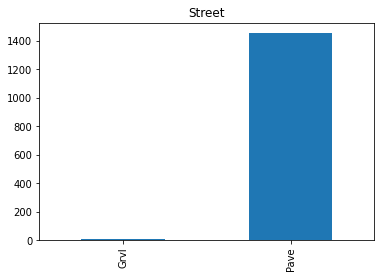

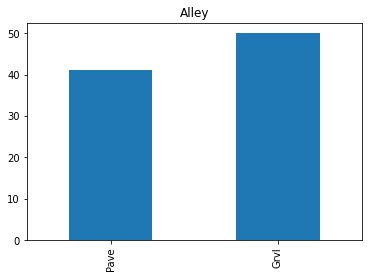

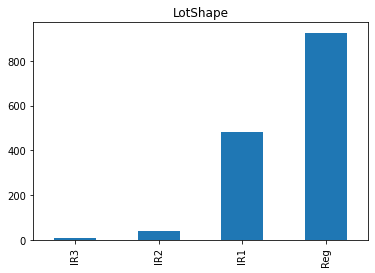

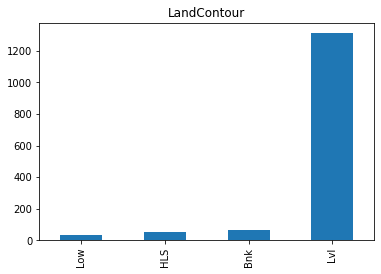

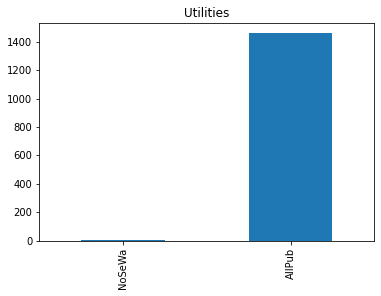

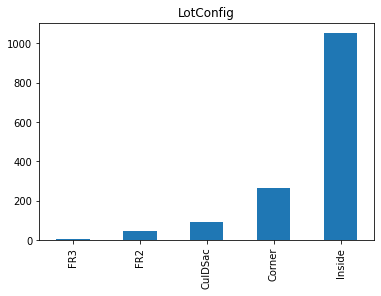

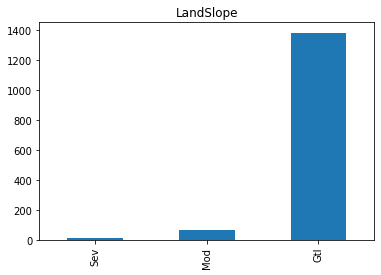

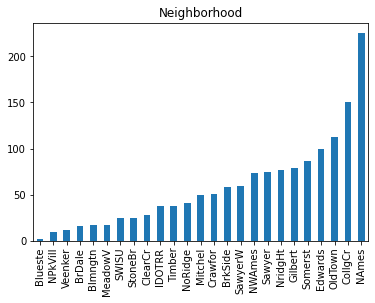

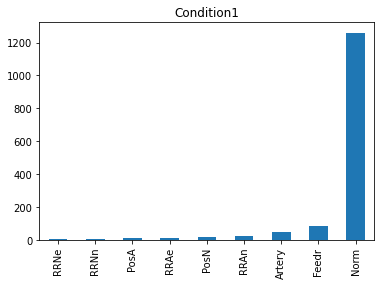

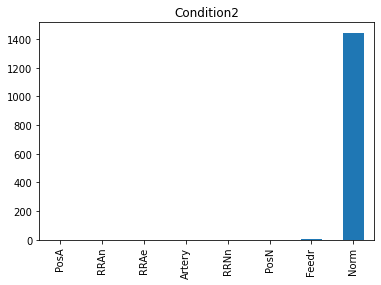

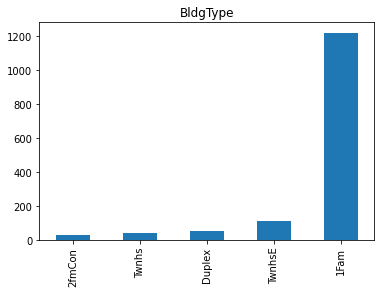

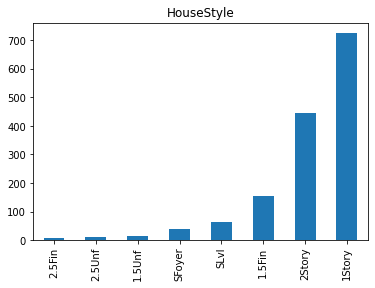

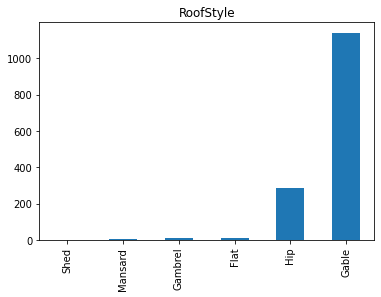

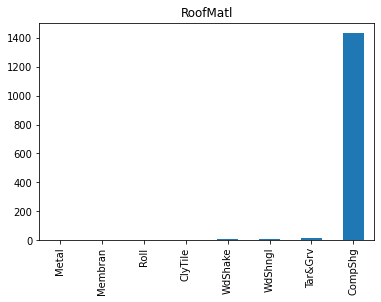

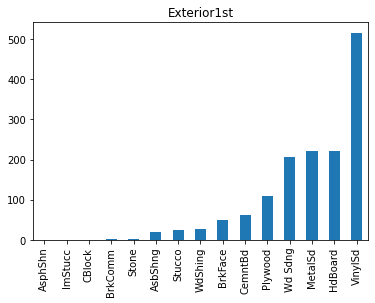

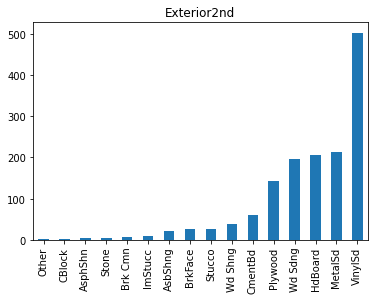

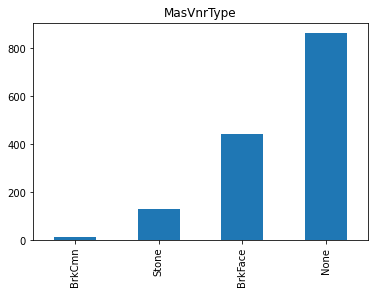

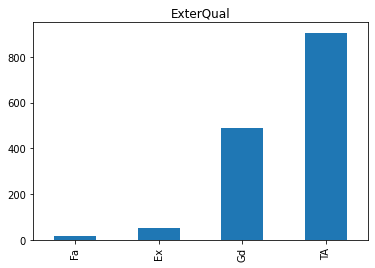

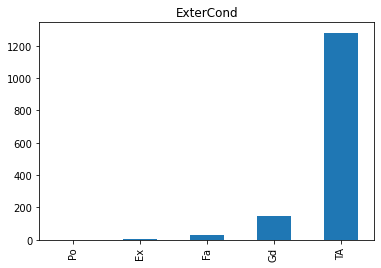

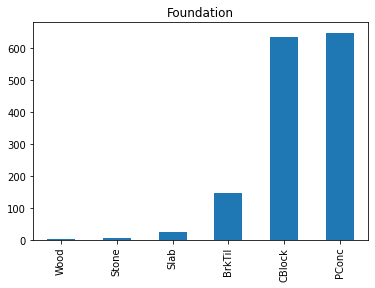

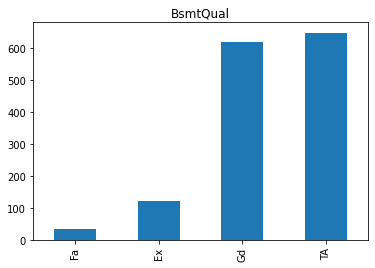

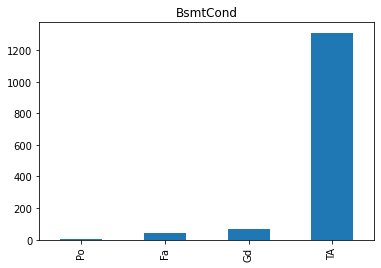

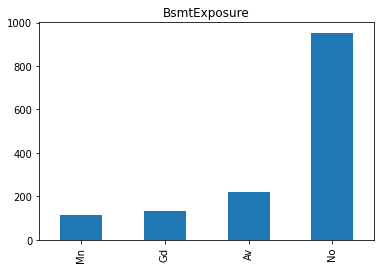

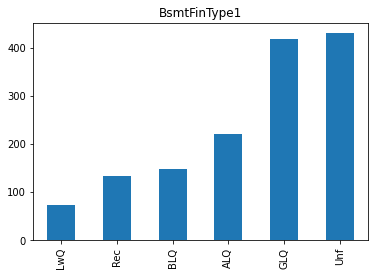

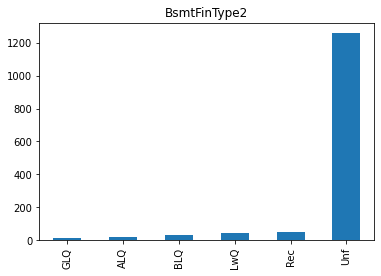

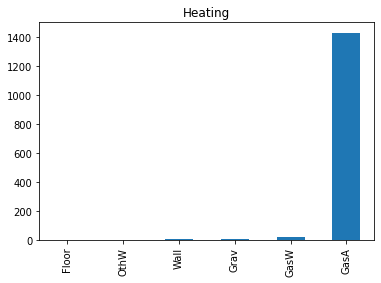

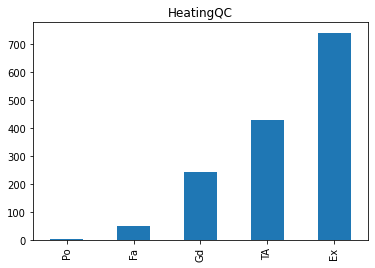

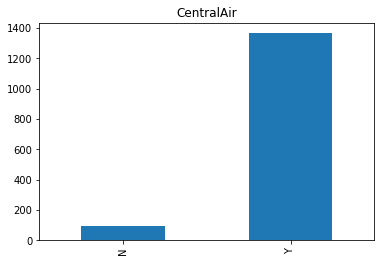

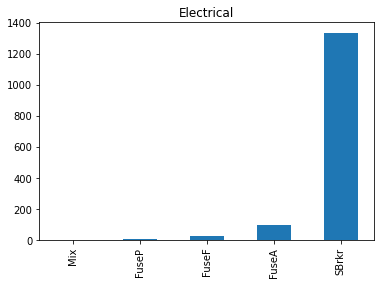

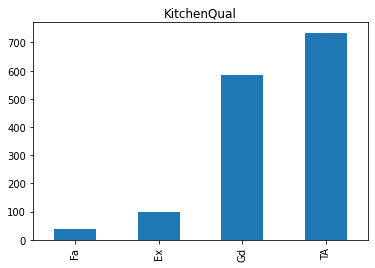

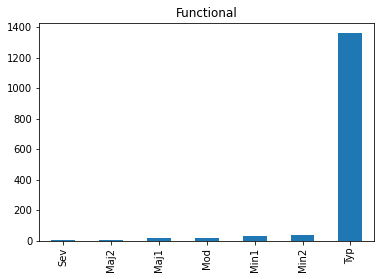

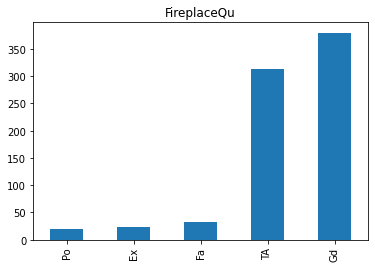

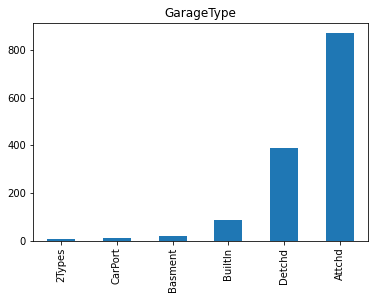

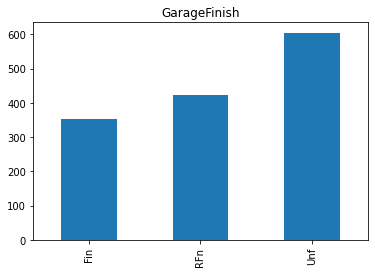

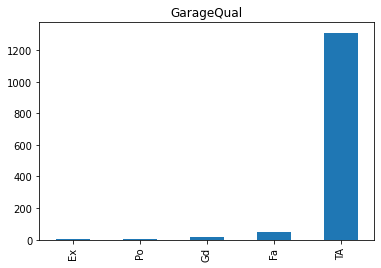

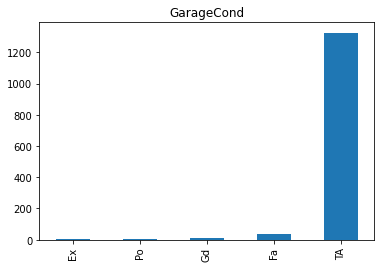

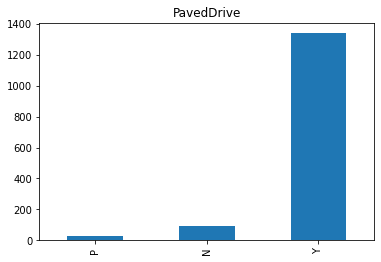

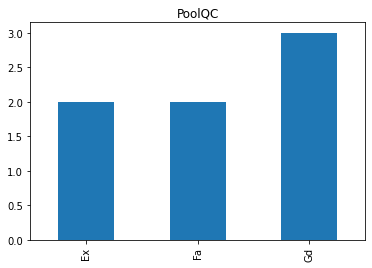

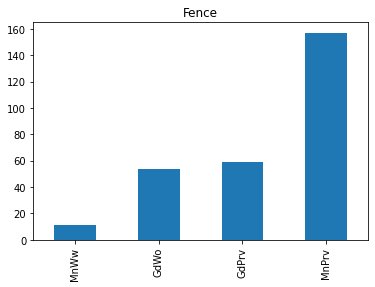

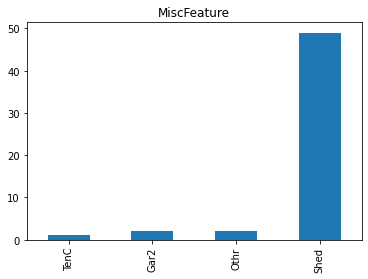

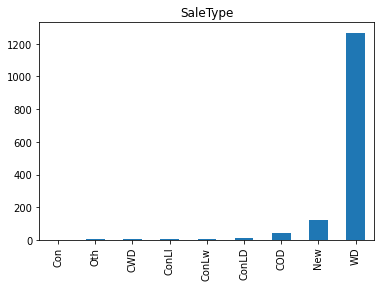

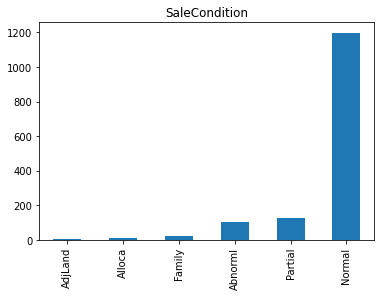

In [98]:
#using the same for loop for the continuous variables, we can do the same for categorical variables
#using the dataframe from about with just categorical variables

for column in categorical_vars:
    plt.figure()
    categorical_vars[column].value_counts().sort_values().plot(kind='bar')
    plt.title(column)
    plt.show()

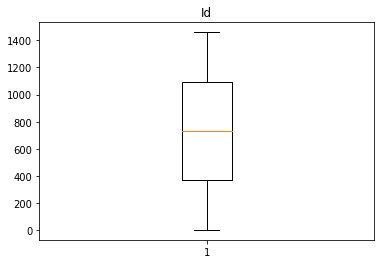

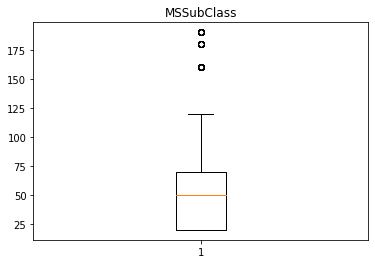

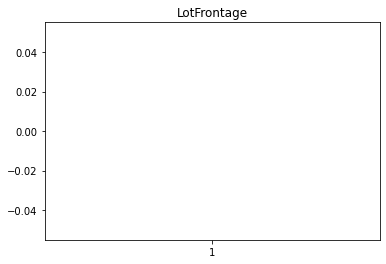

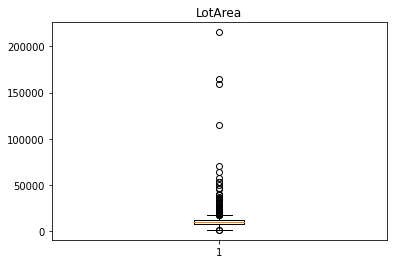

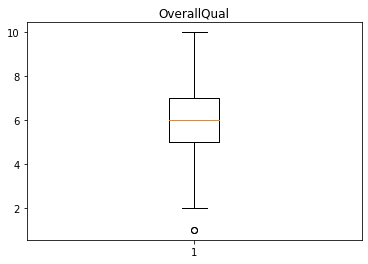

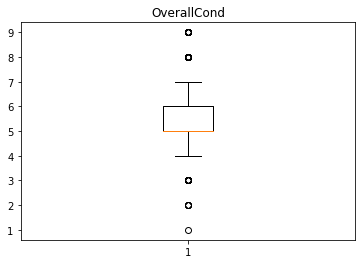

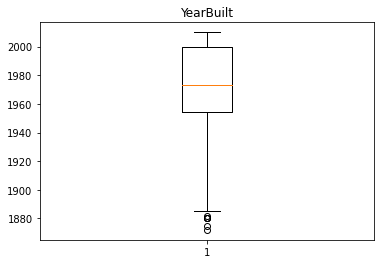

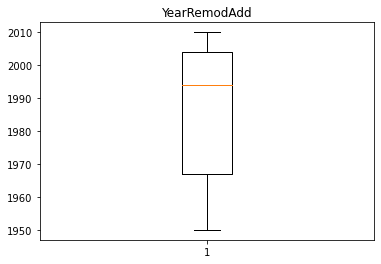

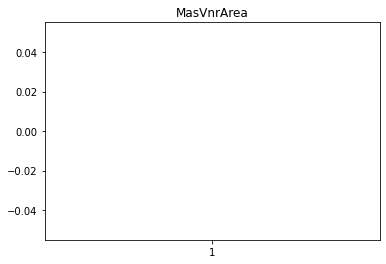

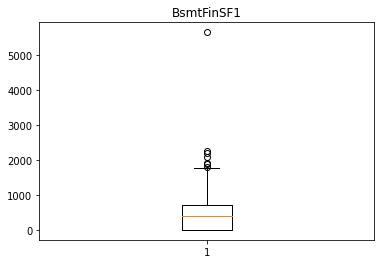

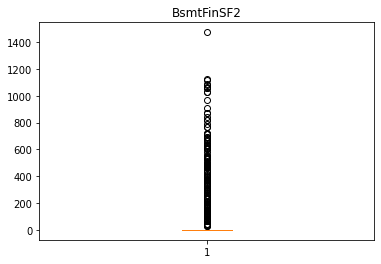

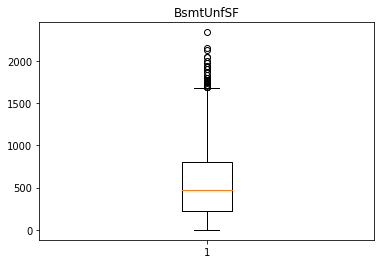

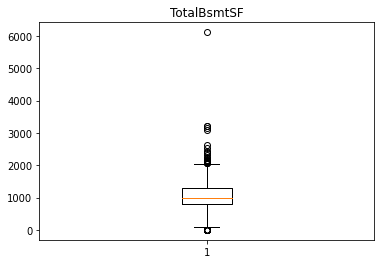

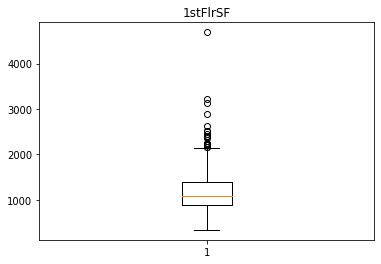

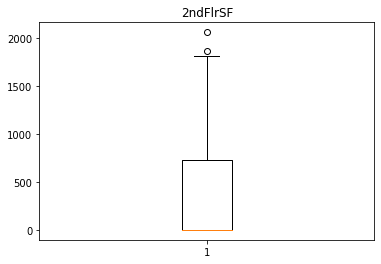

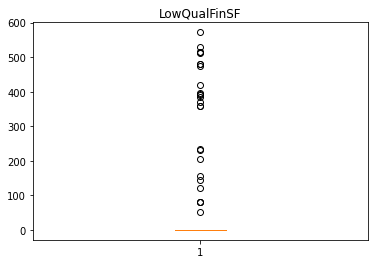

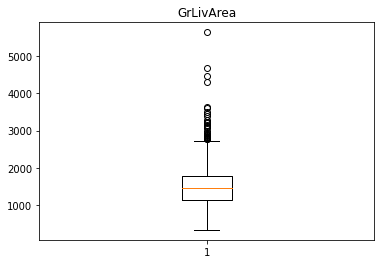

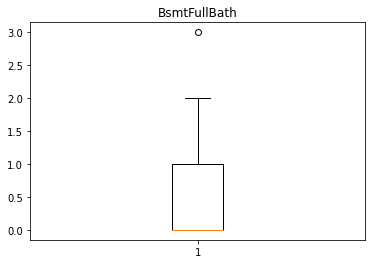

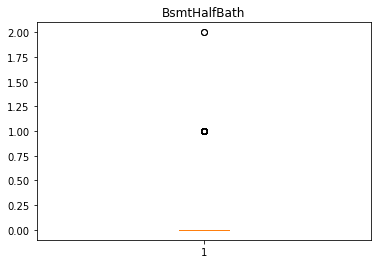

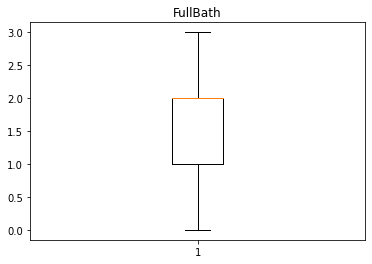

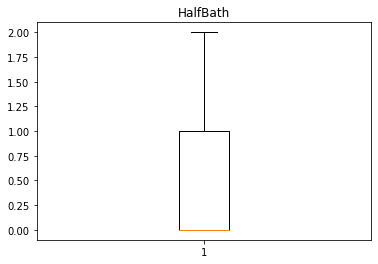

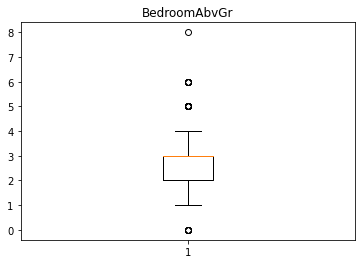

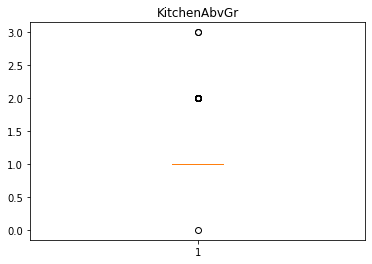

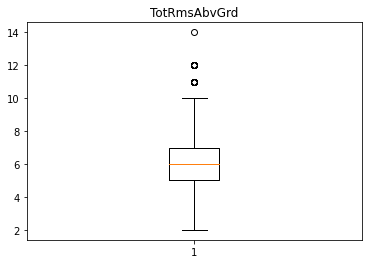

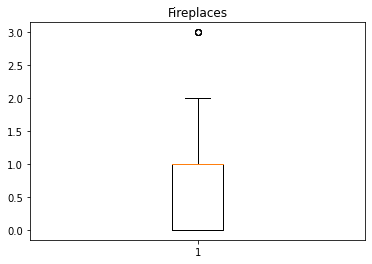

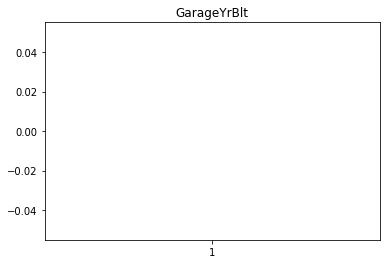

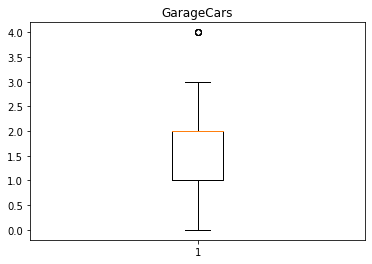

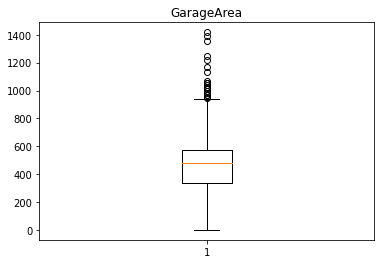

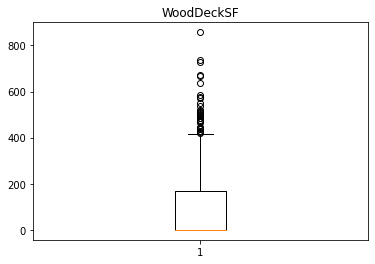

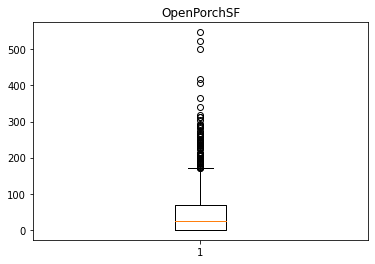

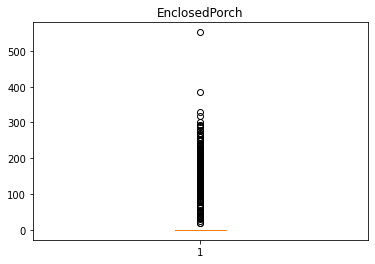

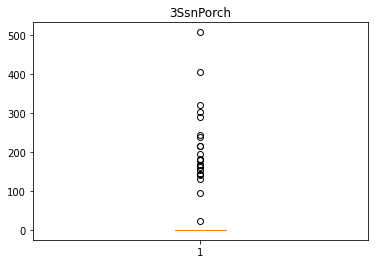

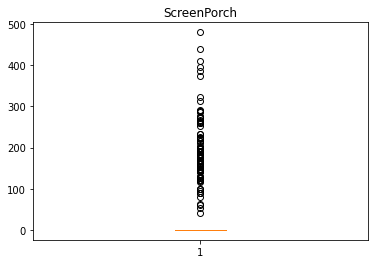

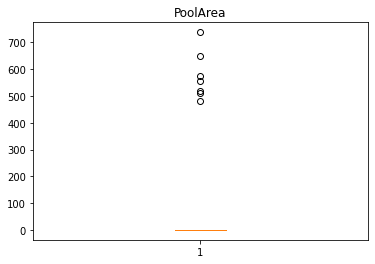

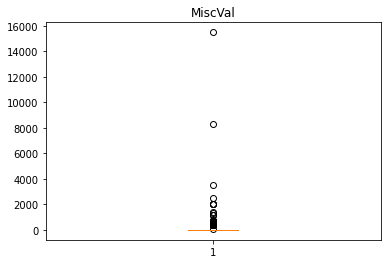

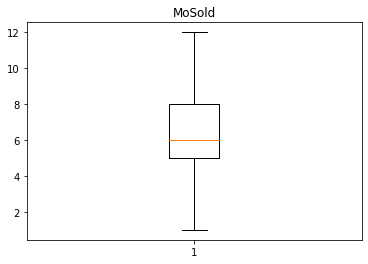

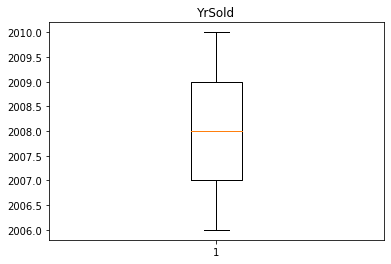

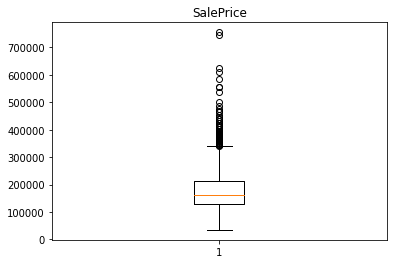

In [99]:
#In additon to the bar graphs, we can also create boxplots as another way to see the distribution of values for our continuous variables
for col in continuous_vars:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

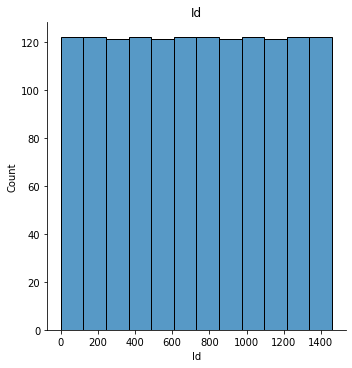

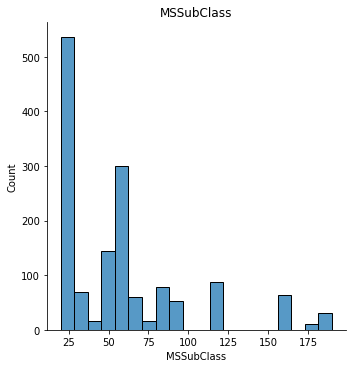

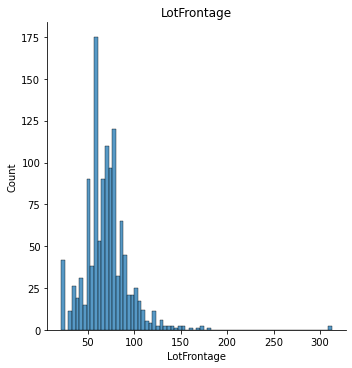

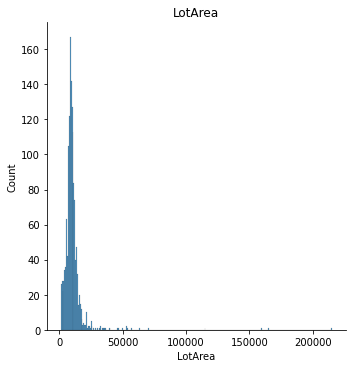

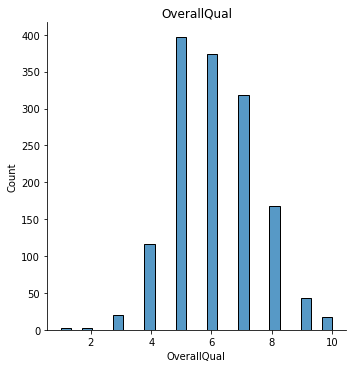

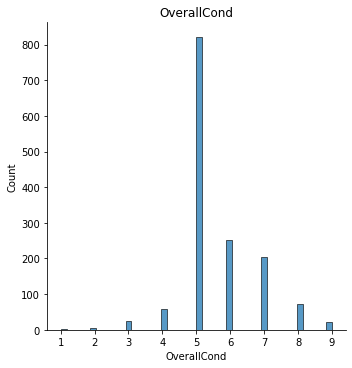

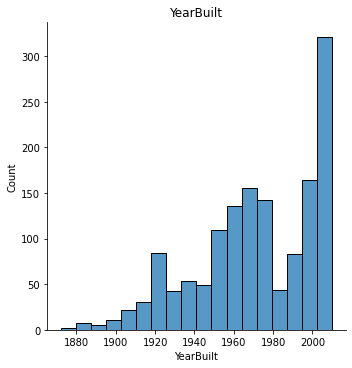

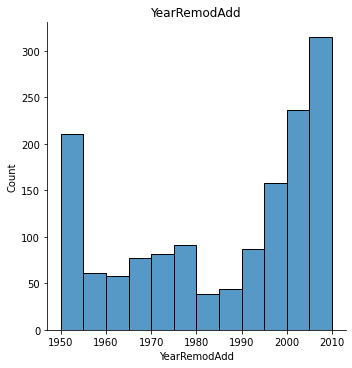

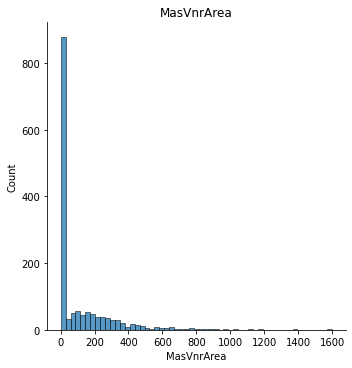

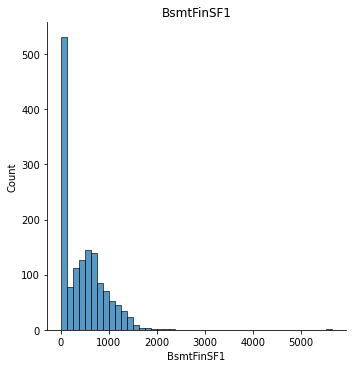

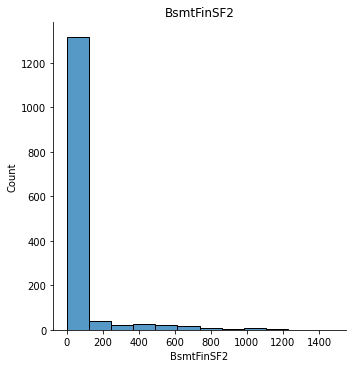

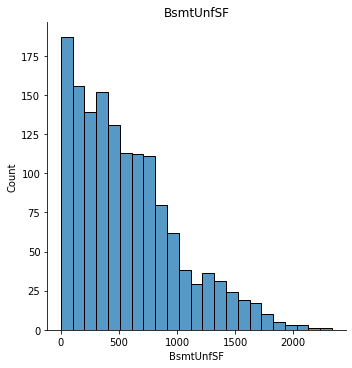

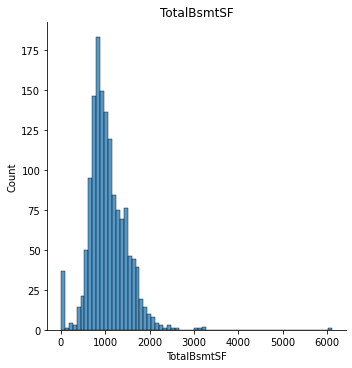

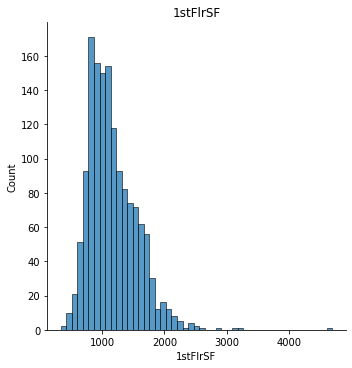

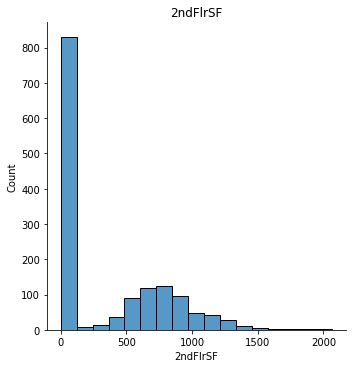

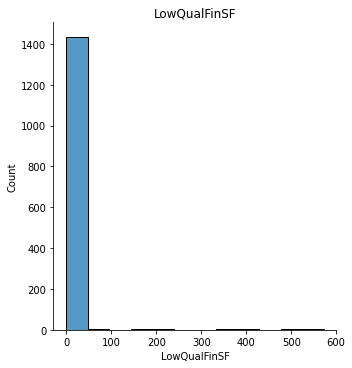

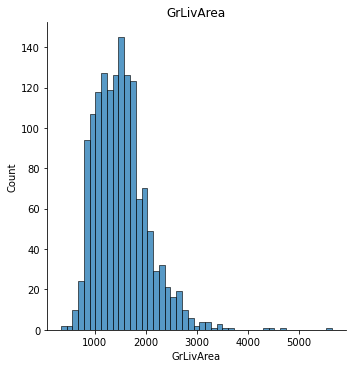

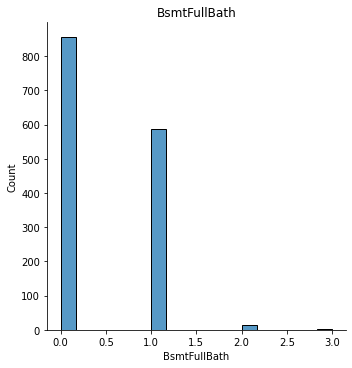

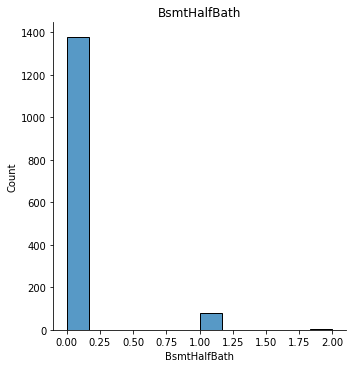

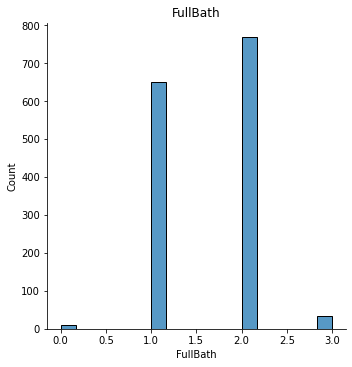

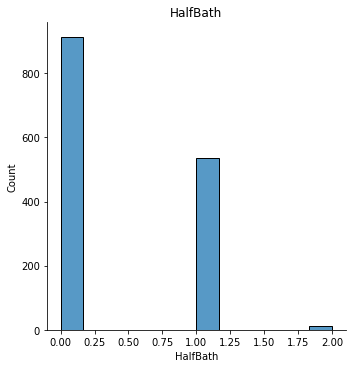

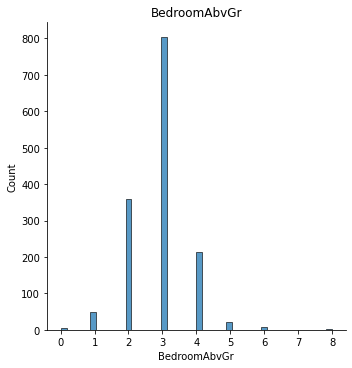

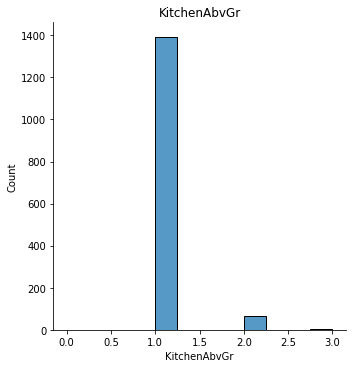

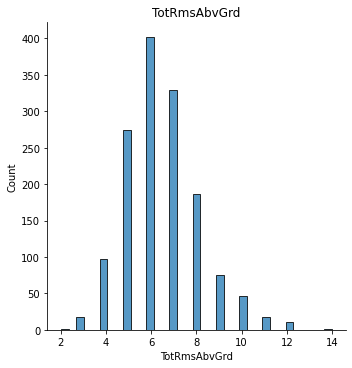

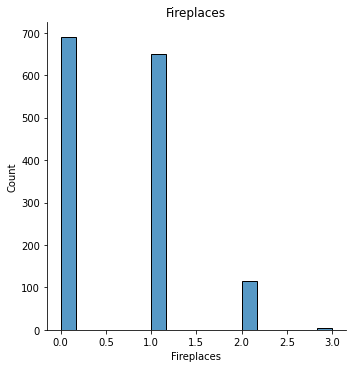

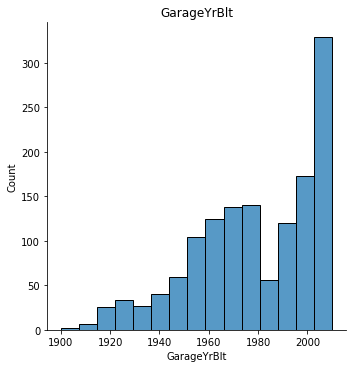

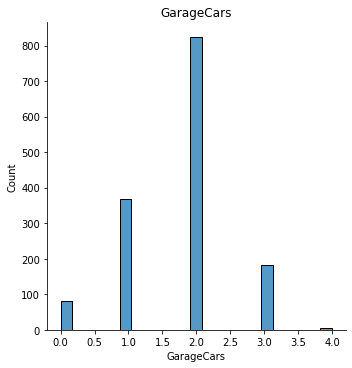

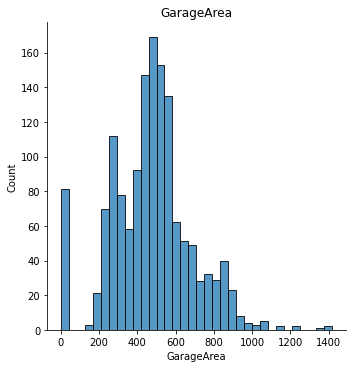

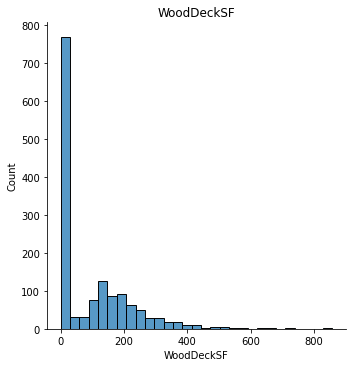

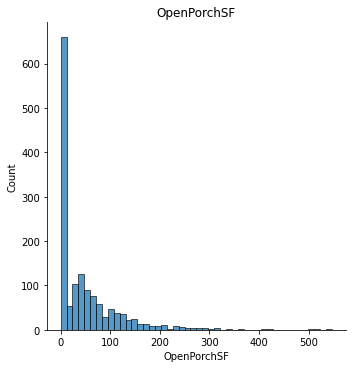

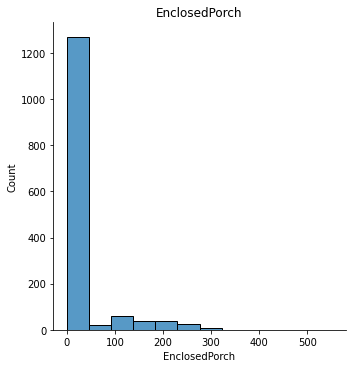

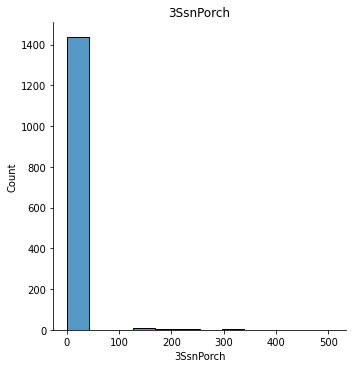

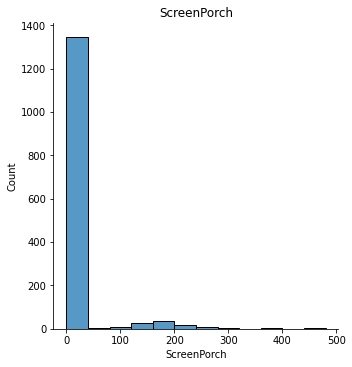

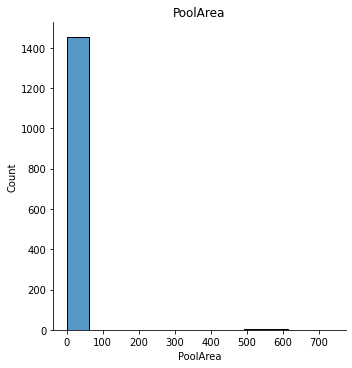

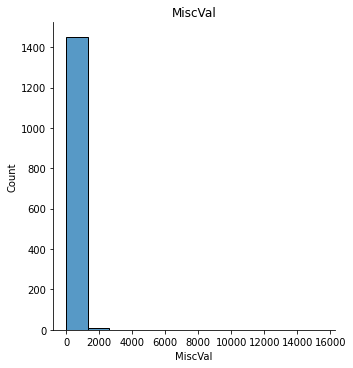

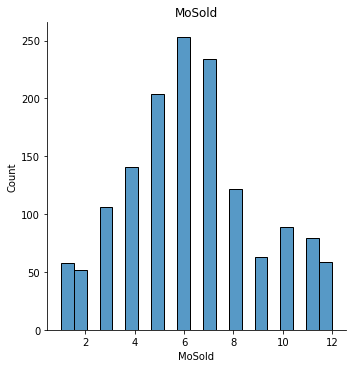

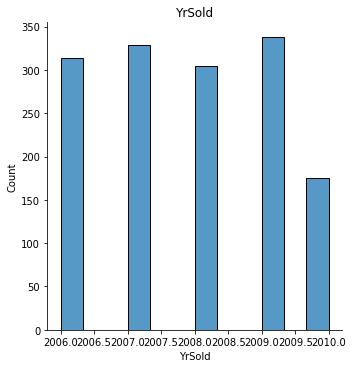

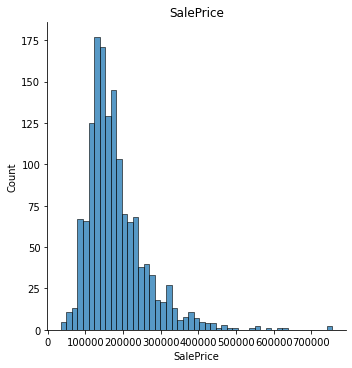

In [100]:
#another graph that can show the distribution of continuous variables using a displot
for col in continuous_vars:
    sns.displot(df[col])
    plt.title(col)
    plt.show()

# Part 2. Fixing the Data Quality Issues Found Above

In [101]:
#copy our dataframe into one that will be cleaned
df_preprocessed = df.copy()

##Dealing with Missing Values

In [102]:
#drop columns in the dataset that have more than 60% of the column missing
#there are numerous categorical variables that have more than 60% of a feating mising, we are going to remove those
df_preprocessed.dropna(thresh=0.6*len(df_preprocessed),axis=1,inplace=True)

In [103]:
#this drops the number of columns we have from 82 down to 77
print(df_preprocessed.shape)

(1460, 77)


In [104]:
#next to deal with the rest of the columns with missing values we will fill those rows in
#to start with the continuous variables, we will fill in missing values with the average of the column
continuous_processed = df_preprocessed.select_dtypes(include=['float', 'int'])

for col in continuous_processed:
    mean = df_preprocessed[col].mean()
    df_preprocessed[col].fillna(mean, inplace=True)

In [105]:
#next we do the same but with the categorical variables, we will fill in missing values with the mode of the column this time instead of average
categorical_processed = df_preprocessed.select_dtypes(include=['object','category'])

for col in categorical_processed:
    mode = df_preprocessed[col].mode()[0]
    df_preprocessed[col].fillna(mode, inplace=True)

In [106]:
#we can now check and see that there is no longer any missing values within the dataset
df_preprocessed.isna().sum()/len(df_preprocessed)*100

Id                        0.0
MSSubClass                0.0
MSZoning                  0.0
LotFrontage               0.0
LotArea                   0.0
Street                    0.0
LotShape                  0.0
LandContour               0.0
Utilities                 0.0
LotConfig                 0.0
LandSlope                 0.0
Neighborhood              0.0
Condition1                0.0
Condition2                0.0
BldgType                  0.0
HouseStyle                0.0
OverallQual               0.0
OverallCond               0.0
YearBuilt                 0.0
YearRemodAdd              0.0
RoofStyle                 0.0
RoofMatl                  0.0
Exterior1st               0.0
Exterior2nd               0.0
MasVnrType                0.0
MasVnrArea                0.0
ExterQual                 0.0
ExterCond                 0.0
Foundation                0.0
BsmtQual                  0.0
BsmtCond                  0.0
BsmtExposure              0.0
BsmtFinType1              0.0
BsmtFinSF1

##Dealing with Cardinality

There does not appear to be any issues when looking at the cardinality in our Data Quality Report

In [107]:
#Here again is a look at the cradinality of the data
df_preprocessed.nunique()

Id                        1460
MSSubClass                  15
MSZoning                     5
LotFrontage                111
LotArea                   1073
Street                       2
LotShape                     4
LandContour                  4
Utilities                    2
LotConfig                    5
LandSlope                    3
Neighborhood                25
Condition1                   9
Condition2                   8
BldgType                     5
HouseStyle                   8
OverallQual                 10
OverallCond                  9
YearBuilt                  112
YearRemodAdd                61
RoofStyle                    6
RoofMatl                     8
Exterior1st                 15
Exterior2nd                 16
MasVnrType                   4
MasVnrArea                 328
ExterQual                    4
ExterCond                    5
Foundation                   6
BsmtQual                     4
BsmtCond                     4
BsmtExposure                 4
BsmtFinT

## Dealing With Outliers

In [108]:
#Following the process of removing missing values, it is worth looking at the outliers
#we will use the zscore to remove the outliers from continuous variables
z = np.abs(stats.zscore(continuous_processed))
df_no_outliers = continuous_processed[(z < 3).all(axis=1)]

In [109]:
#Next step would be to drop the duplicates, as we do not want any duplicates in our dataset
df_preprocessed = df_preprocessed.drop_duplicates()

# Part 3. Collinearity and Feature Identification

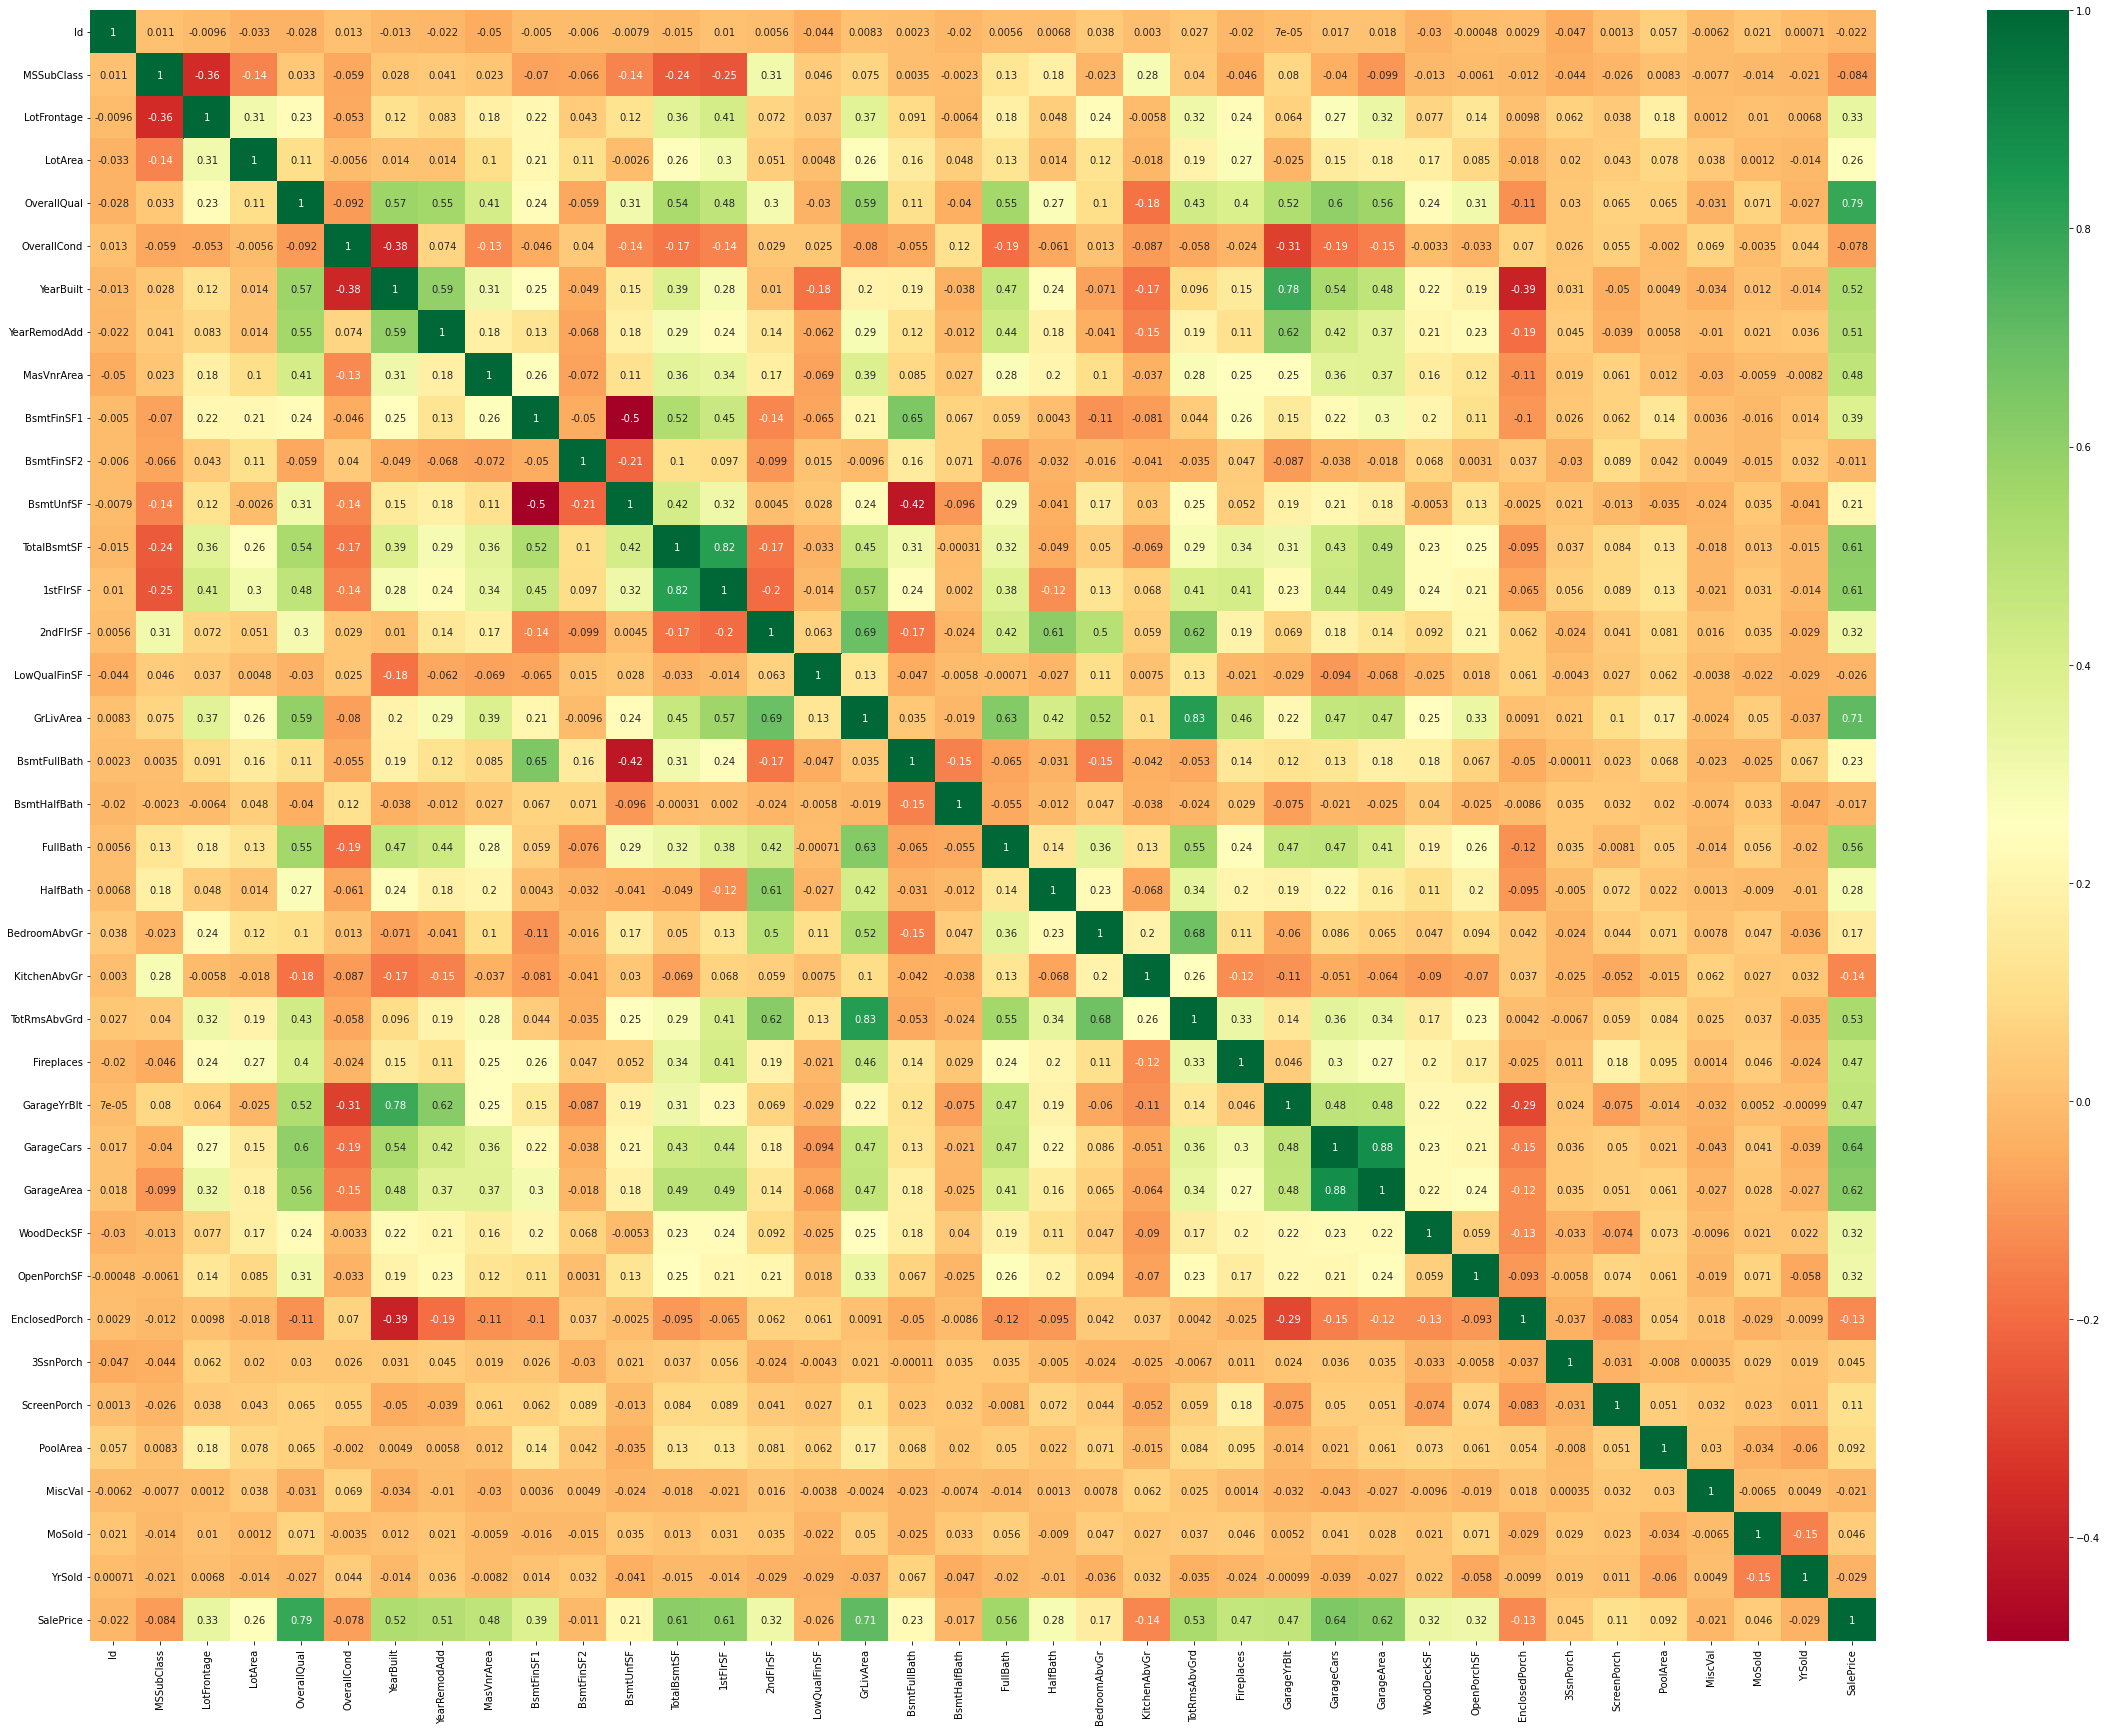

In [110]:
#the next step would be to then look at the correlation between variables and figure out what columns would need to be dropped based on strong correlation patterns
#next we can create a correlation matrix by plotting a heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(df_preprocessed.corr(), cmap='RdYlGn', annot=True)
plt.show()

Based on the scatterplot matrix we would want to look for features that are 
both strongly positively correlated and both strongly correlated.


Our threshold to look at are for features with a .8 or a -.8 correlation coefficient.
We can see there is no two feates that are correlated below -.5 so we are going to look at the ones that are strongly correlated

However it should be noted to look at the strongest negatively correlated featues, which are:
* BsmtUnfSF and BsmtFinSF1
* BsmtFullBath and BsmtUntSF

** interesting to not both include BsmtUntSF and thus might be a feature worth removing


From the top there looks to be a correlation between: 

1.   1stFlrSF and 2ndFlrSF
2.   GrLivArea and TotRmsAbvGrd
3.   GarageCars and GarageArea

Additionally, there were two that were just outside at .79 that are still worth looking into:


1. OverallQual and SalePrice
2. YearBuilt and GarageYrBlt


##Below are the graphs for the correlated features

These are for the two strongly negative features

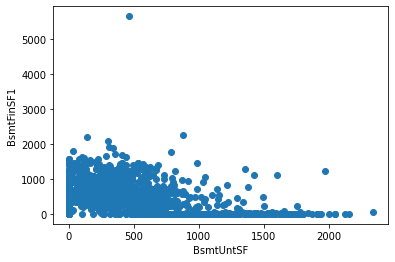

In [111]:
#Basement Unfiished SF vs Basement Finished SF
plt.scatter(df['BsmtUnfSF'], df['BsmtFinSF1'])
plt.xlabel('BsmtUntSF')
plt.ylabel('BsmtFinSF1')
plt.show()

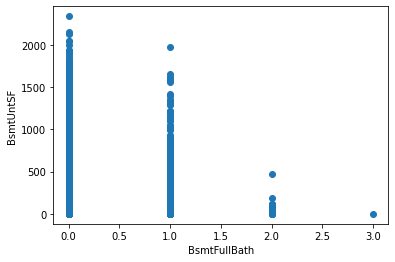

In [112]:
#Basement Full Bath vs Basement SF
plt.scatter(df['BsmtFullBath'], df['BsmtUnfSF'])
plt.xlabel('BsmtFullBath')
plt.ylabel('BsmtUntSF')
plt.show()
#As stated above both of the two strong negative correlations include BsmtUnfSF, as we can see the negative correlation patterns it would be worth removing

These are for the strong correlated features

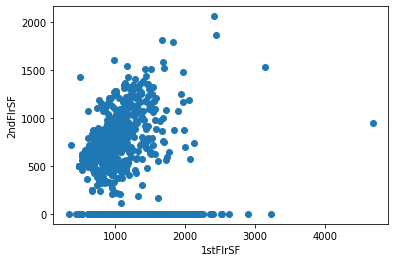

In [113]:
#SF of 1st Flr vs SF of 2nd Flr
plt.scatter(df['1stFlrSF'], df['2ndFlrSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('2ndFlrSF')
plt.show()

#this makes sense as most of the time the square footage is going to be pretty similiar if a house is multi store
#worth removing one of these factors, more likely 2ndFlrSF as there are many zeros in the dataset

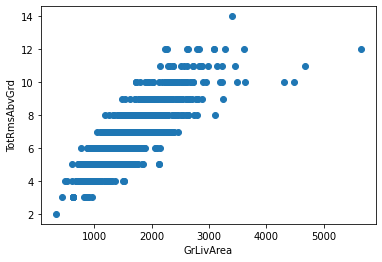

In [114]:
#Garage Live Area vs Rooms above Ground
plt.scatter(df['GrLivArea'], df['TotRmsAbvGrd'])
plt.xlabel('GrLivArea')
plt.ylabel('TotRmsAbvGrd')
plt.show()
#there shows to be a strong pattern of colinearity, one of these features should be removed

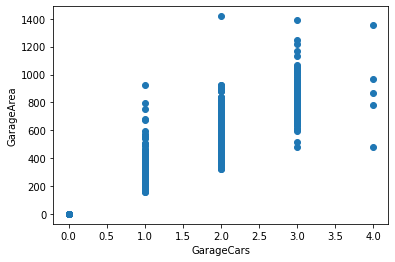

In [115]:
#Cars vs Area of Garage
plt.scatter(df['GarageCars'], df['GarageArea'])
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.show()
#This is another feature that makes sense, as the area of the garage increases, the more likely number of cars there are to be
#Garage Cars in this case would be worth removing

Under .8 but are still worth looking at

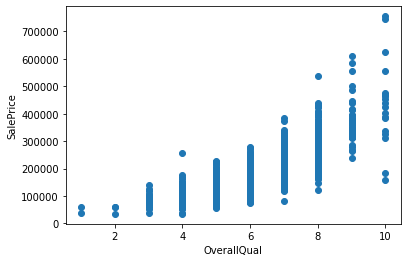

In [116]:
#Quality vs Price
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()
#There is a large correlation between these two, but as it is under the .8 value, it might be worth keeping both in the model

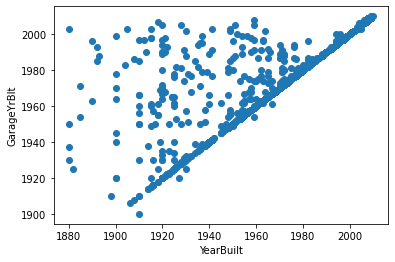

In [117]:
#Year Built and Garage Year Built
plt.scatter(df['YearBuilt'], df['GarageYrBlt'])
plt.xlabel('YearBuilt')
plt.ylabel('GarageYrBlt')
plt.show()
#These two features have almost an linear line running through them. It makes sense as if a house is built a garage would also be built at the same time
#It would be worth removing one of these features, more likely better to remove GarageYrBlt

## Summary of Colinearity
The features worth removing are:
* GarageYrBlt
* GarageCars
* TotRmsAbvGr or GrLivArea
* 2ndFlrSF
* BsmUnSF
* MSSubClass*

It might also be worth removing the other MSSubClass as we already created a binned categorical version of it earlier